In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
import xgboost as XGB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

- As recommended by the author of the data, Outlinear in the GrLivArea should be removed. The author stated that “I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.” It makes sense that people would pay for the more living area. What doesn't make sense is the two datapoints in the bottom-right of the plot. We need to take care of this! What we will do is remove these outliers manually.
- log for target np.log1p(train["SalePrice"])
- plot corr between data and saes price. for 5 best correlation do the corr plot
- plot salesprice distribution and change it to log to remove skawed data
- explore all features and think if the data make sense. Remove outliers
- predict only with numerical features without preprocessing, check which one were important
- predict with numerical plus label encoding
- predict with numerical plus onehot
- test hypothesis for independet values

- feature engineering, more feature selection, remove brother columns https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
https://www.kaggle.com/winternguyen/eda-prediction-of-house-price
- check Skewed features before one hot encoding
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
-modeling with

Gradient Boosting regression,
CatbootRegressor,
XGBRegressor, and
LGBMRegressor.
 [['DecisionTreeRegressor',DecisionTreeRegressor()],
  ['XGBRegressor', XGBRegressor()],
  ['CatBoostRegressor', CatBoostRegressor(verbose= False)],
  ['LGBMRegressor',lgb.LGBMRegressor()],
  ['GradientBoostingRegressor',GradientBoostingRegressor()],
  ['ExtraTreesRegressor',ExtraTreesRegressor()]]
  
- model parameters tuning with grid search
- ensamble diffrent models for submission

- check also snn

### read data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
train = df_train.copy()
test = df_test.copy()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

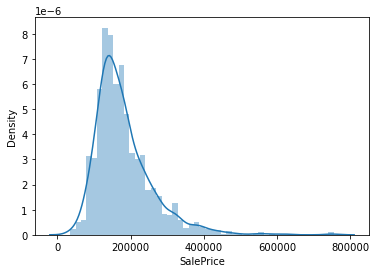

In [3]:
sns.distplot(train['SalePrice'],label = 'target')

### explore the data

In [4]:
print('Train dataset has {} columns and {} rows \n'.format(train.shape[1],train.shape[0]))

print('We have following data types in data frame: {}, {}, {} '.format(train.dtypes.unique()[0],train.dtypes.unique()[1],train.dtypes.unique()[2]))

Train dataset has 81 columns and 1460 rows 

We have following data types in data frame: int64, object, float64 


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Plot the best 10 correlations


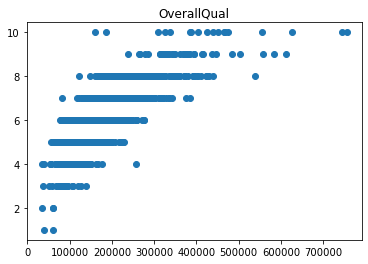

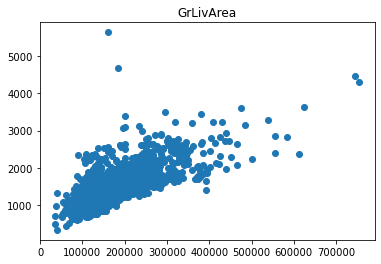

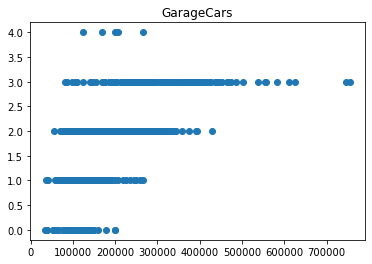

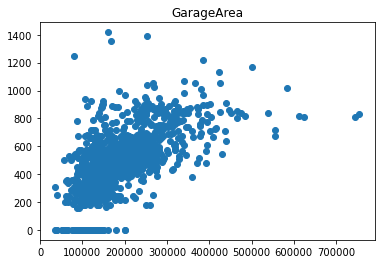

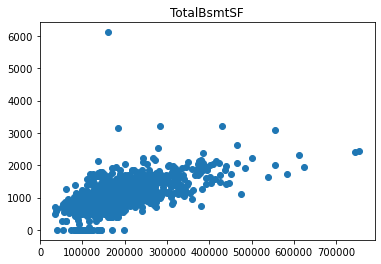

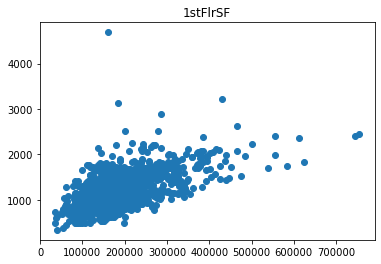

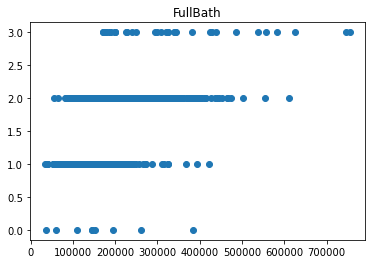

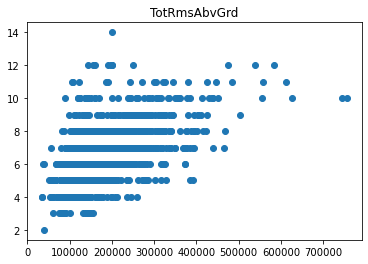

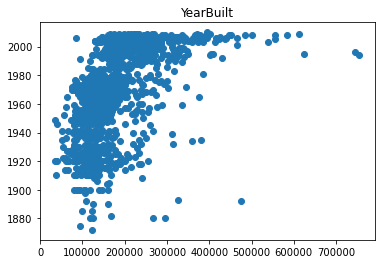

In [6]:
train.corr()['SalePrice'].sort_values(ascending=False)

print('Plot the best 10 correlations')

for col in train.corr()['SalePrice'].sort_values(ascending=False)[1:10].index:
    plt.figure()
    plt.scatter(train['SalePrice'],train[col])
    plt.title(col)

In [7]:
print('10 columns with the highes numbers of NaN values:\n{}\n'.format((pd.isna(train).sum().sort_values(ascending=False)/len(train))[:10]))

print('In a lot of cases NaN values mean that something is inaccessible. In this cases I will replace this value with "None"')

10 columns with the highes numbers of NaN values:
PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
dtype: float64

In a lot of cases NaN values mean that something is inaccessible. In this cases I will replace this value with "None"


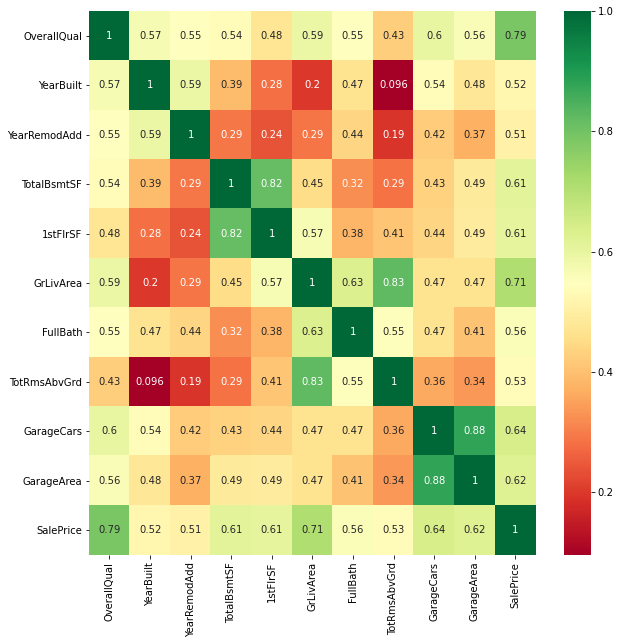

In [8]:
corr = train.corr()
high_corr = corr.index[abs(corr['SalePrice'])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[high_corr].corr(),annot=True,cmap="RdYlGn")

### Preprocessing

In [8]:
columns_for_drop = ['MiscFeature']
def clean_df(df,columns_for_drop):
    
    df['Alley'] = df["Alley"].fillna("None")
    df['MasVnrType'] = df["MasVnrType"].fillna("None")
    df['BsmtQual'] = df["BsmtQual"].fillna("None")
    df['BsmtCond'] = df["BsmtCond"].fillna("None")
    df['BsmtExposure'] = df["BsmtExposure"].fillna("None")
    df['BsmtFinType1'] = df["BsmtFinType1"].fillna("None")
    df['BsmtFinType2'] = df["BsmtFinType2"].fillna("None")
    df['FireplaceQu'] = df["FireplaceQu"].fillna("None")
    df['GarageType'] = df["GarageType"].fillna("None")
    df['GarageFinish'] = df["GarageFinish"].fillna("None")
    df['GarageQual'] = df["GarageQual"].fillna("None")
    df['GarageCond'] = df["GarageCond"].fillna("None")
    df['KitchenQual'] = df['KitchenQual'].fillna("None")
    df['PoolQC'] = df["PoolQC"].fillna("None")
    df['Fence'] = df["Fence"].fillna("None")
    df['LotFrontage'] = df['LotFrontage'].fillna(-1)
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(-1)
    df['MasVnrArea'] = df['MasVnrArea'].fillna(-1)
    df['Electrical'] = df['Electrical'].fillna(-1)    
    return df

columns_for_drop = ['MiscFeature','Id']
def clean_data(df,columns_for_drop):
    
    df_id = df.Id
    df = df.drop(columns_for_drop,axis=1)
    df = df.apply(lambda x: x.fillna('None') if x.dtype == object else x.fillna(-1))
    return df_id, df


# skewed data
def prepare_skew_data(df):    
    skew_features = df.skew().sort_values()
    high_skew = skew_features[abs(skew_features)>0.5]
    for feature in high_skew.index:
        c = 0.0000001
        df[feature].apply(lambda x: np.log1p(c + x))
    return df

def encode_label(df, col_label_dict):
    for col in df:
        mapping = cat_to_num.get(col)
        if mapping is not None:
            df[col] = df[col].map(mapping)
    return df

def add_features(df):
    
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
    df['TotalGarage'] = df['GarageCars'] + df['GarageArea'] 
    df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']  
    #features ideas took from kaggle
    df["NEW_TOTALQUAL_index"] = df["OverallQual"] * df["GarageArea"] * df["GrLivArea"]
    df["NEW_Yr_sold"] = df["YrSold"] - df["YearBuilt"]
    df["NEW_Yr_sold_index"] = pd.qcut(df["NEW_Yr_sold"], q=5, labels=[5, 4, 3, 2, 1])
    df["NEW_Yr_sold_index"] = df["NEW_Yr_sold_index"].astype(int)
    df['NEW_TotalSF'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['NEW_YrBltAndRemod'] = df['YearRemodAdd'] - df['YearBuilt']
    df["NEW_YrBltAndRemod"].min()
    df['NEW_Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['NEW_Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['NEW_Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
    df["NEW_AREA"] = df["GrLivArea"] + df["GarageArea"]
    df['TotalLot'] = df['LotFrontage'] + df['LotArea']
    df['TotalBsmtFin'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
    df['TotalSF'] = df['TotalBsmtSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + df['HalfBath']
    df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']
    df.loc[(df['MoSold'] >= 3) & (df['MoSold'] <= 5), 'New_MoSold_index'] = 'Spring'
    df.loc[(df['MoSold'] >= 6) & (df['MoSold'] <= 8), 'New_MoSold_index'] = 'Summer'
    df.loc[(df['MoSold'] >= 9) & (df['MoSold'] <= 11), 'New_MoSold_index'] = 'Autumn'
    df.loc[df["New_MoSold_index"].isnull(), "New_MoSold_index"] = "Winter"
    df["New_SqFtPerRoom"] = df["GrLivArea"] / (df["TotRmsAbvGrd"] + df["FullBath"] + df["HalfBath"] + df["KitchenAbvGr"])
    df["New_Garage_Area_ratio"] = (df["GarageArea"] / df["LotArea"]) * 100
    df["New_LotQuall"] = df["OverallQual"] * df["LotArea"]
    df["New_QuallYear"] = (df["YrSold"].max() - df["YearBuilt"]) * df["OverallQual"]
    df["New_Totall_Area"] = df["GarageArea"] + df["GrLivArea"]
    
    return df

In [9]:
class CleanData(BaseEstimator, TransformerMixin):
    """
    clean 
    """
    columns_for_drop = ['MiscFeature']
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_id = X.Id
        X = X.drop(self.columns_for_drop,axis=1)
        X = X.apply(lambda x: x.fillna('None') if x.dtype == object else x.fillna(-1))
        return X
    

class PrepareSkewData(BaseEstimator, TransformerMixin):
    """
     
    """
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        skew_features = X.skew().sort_values()
        high_skew = skew_features[abs(skew_features)>0.5]
        for feature in high_skew.index:
            c = 0.0000001
            X[feature].apply(lambda x: np.log1p(c + x))
        return X
    

class EncodeLabel(BaseEstimator, TransformerMixin):
    """
     
    """
        
    cat_to_num = {'PoolQC':{'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0},
                  'ExterQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                  'ExterCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                  'BsmtQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0},
                  'BsmtCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0},
                  'BsmtExposure':{'Gd':4,'Av':3,'Mn':2,'No':1,'None':0},
                  'BsmtFinType1':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0},
                  'BsmtFinType2':{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0},
                  'HeatingQC':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
                  'CentralAir':{'N':0,'Y':1},
                  'KitchenQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0},
                  'FireplaceQu':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0},
                  'GarageQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0},
                  'GarageCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}
                 }
    
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for col in X:
            mapping = self.cat_to_num.get(col)
            if mapping is not None:
                X[col] = X[col].map(mapping)
        return X
    

class AddFeatures(BaseEstimator, TransformerMixin):
    """
     
    """
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
        X['TotalBath'] = X['BsmtFullBath'] + X['BsmtHalfBath'] + X['FullBath'] + X['HalfBath']
        X['TotalGarage'] = X['GarageCars'] + X['GarageArea'] 
        X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']  
        #features ideas took from kaggle
        X["NEW_TOTALQUAL_index"] = X["OverallQual"] * X["GarageArea"] * X["GrLivArea"]
        X["NEW_Yr_sold"] = X["YrSold"] - X["YearBuilt"]
        X["NEW_Yr_sold_index"] = pd.qcut(X["NEW_Yr_sold"], q=5, labels=[5, 4, 3, 2, 1])
        X["NEW_Yr_sold_index"] = X["NEW_Yr_sold_index"].astype(int)
        X['NEW_TotalSF'] = (X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF'])
        X['NEW_YrBltAndRemod'] = X['YearRemodAdd'] - X['YearBuilt']
        X["NEW_YrBltAndRemod"].min()
        X['NEW_Total_sqr_footage'] = (X['BsmtFinSF1'] + X['BsmtFinSF2'] + X['1stFlrSF'] + X['2ndFlrSF'])
        X['NEW_Total_Bathrooms'] = (X['FullBath'] + (0.5 * X['HalfBath']) + X['BsmtFullBath'] + (0.5 * X['BsmtHalfBath']))
        X['NEW_Total_porch_sf'] = (X['OpenPorchSF'] + X['3SsnPorch'] + X['EnclosedPorch'] + X['ScreenPorch'] + X['WoodDeckSF'])
        X["NEW_AREA"] = X["GrLivArea"] + X["GarageArea"]
        X['TotalLot'] = X['LotFrontage'] + X['LotArea']
        X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
        X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
        X['TotalBath'] = X['FullBath'] + X['HalfBath']
        X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']
        X.loc[(X['MoSold'] >= 3) & (X['MoSold'] <= 5), 'New_MoSold_index'] = 'Spring'
        X.loc[(X['MoSold'] >= 6) & (X['MoSold'] <= 8), 'New_MoSold_index'] = 'Summer'
        X.loc[(X['MoSold'] >= 9) & (X['MoSold'] <= 11), 'New_MoSold_index'] = 'Autumn'
        X.loc[X["New_MoSold_index"].isnull(), "New_MoSold_index"] = "Winter"
        X["New_SqFtPerRoom"] = X["GrLivArea"] / (X["TotRmsAbvGrd"] + X["FullBath"] + X["HalfBath"] + X["KitchenAbvGr"])
        X["New_Garage_Area_ratio"] = (X["GarageArea"] / X["LotArea"]) * 100
        X["New_LotQuall"] = X["OverallQual"] * X["LotArea"]
        X["New_QuallYear"] = (X["YrSold"].max() - X["YearBuilt"]) * X["OverallQual"]
        X["New_Totall_Area"] = X["GarageArea"] + X["GrLivArea"]

        return X
    
class GetDummies(BaseEstimator, TransformerMixin):
    """
     
    """
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = pd.get_dummies(X)
        return X
    
def build_pipeline(
                   clean_data=True,
                   skew_data=True,
                   encode_label=True,
                   add_features=True,
                   get_dummies=True,
                   model=False):
    pipeline_steps = []
    if clean_data:
        pipeline_steps.append(('clean_data', CleanData()))
    if skew_data:
        pipeline_steps.append(('skew_data', PrepareSkewData()))
    if encode_label:
        pipeline_steps.append(('encode_label', EncodeLabel()))
    if add_features:
        pipeline_steps.append(('add_features', AddFeatures()))
    if get_dummies:
        pipeline_steps.append(('get_gummies', GetDummies()))
    if model:
        pipeline_steps.append(('linear', LinearRegression()))
    return Pipeline(pipeline_steps)

### Preprocessing Pipeline

In [10]:
y_train = np.log(train['SalePrice'])
train = train.drop('SalePrice',axis=1)

preprocessing_pipeline = build_pipeline(
                   clean_data=True,
                   skew_data=True,
                   encode_label=True,
                   add_features=True,
                   get_dummies=True,
                   model=False)
pipeline_train = preprocessing_pipeline.fit_transform(train)
train_id = pipeline_train['Id']
train = pipeline_train.drop('Id',axis=1)

pipeline_test = preprocessing_pipeline.fit_transform(test)# here fit_transform or 
test_id = pipeline_test['Id']
test = pipeline_test.drop('Id',axis=1)

# choose only columns from both df
test = test[test.columns & train.columns]
train = train[test.columns & train.columns]

In [50]:
"{}".format(preprocessing_pipeline.steps)

"[('clean_data', CleanData()), ('skew_data', PrepareSkewData()), ('encode_label', EncodeLabel()), ('add_features', AddFeatures()), ('get_gummies', GetDummies())]"

### Voting Regressor

In [11]:
rfr = RandomForestRegressor()

xgb = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)

el = ElasticNet(alpha=0.001, l1_ratio=0.5)


In [16]:
voting_regressor = VotingRegressor(
                    estimators=[('rfr',rfr),('xgb',xgb),('el',el)])

voting_regressor.fit(train,y_train)
results = {}
for reg in (rfr,xgb,el,voting_regressor):
    scores = cross_val_score(reg,train,y_train,scoring='neg_mean_squared_error',cv=5)
    print(reg.__class__.__name__,np.mean(np.sqrt(-scores)))
    #results["{}".format(preprocessing_pipeline.steps)]= {reg.__class__.__name__:np.mean(np.sqrt(-scores))}

RandomForestRegressor 0.14135813515706597
XGBRegressor 0.12037375626197491
ElasticNet 0.13022665677373463
VotingRegressor 0.12178538640726047


In [13]:
np.sqrt(-scores)

array([0.12936018, 0.15789327, 0.14459164, 0.13132889, 0.1400962 ])

In [15]:
results

{"[('clean_data', CleanData()), ('skew_data', PrepareSkewData()), ('encode_label', EncodeLabel()), ('add_features', AddFeatures()), ('get_gummies', GetDummies())]": {'RandomForestRegressor': 0.14065403585161101}}

In [ ]:
voting_regressor.fit(train,y_train)
pred = voting_regressor.predict(test)
np.exp(pred)

### baseline model

### grid search of parameters

In [54]:
voting_regressor = VotingRegressor(
                    estimators=[('rfr',rfr),('xgb',xgb),('el',el)])


params = {'rfr__max_depth': [5, 10],'rfr__n_estimators': [20, 200], 'el__alpha':[0.001,0.5], 'el__l1_ratio':[0.5,0.75]}


random_search = RandomizedSearchCV(voting_regressor, param_distributions=params,n_iter=4)
random_search.fit(train,y_train)
print(random_search.best_params_)

{'rfr__n_estimators': 20, 'rfr__max_depth': 10, 'el__l1_ratio': 0.5, 'el__alpha': 0.001}


### feature importance

In [ ]:
### sprawdzic model, zinterpretowac go, zastanowic sie dlaczego w niektoryh miejscach jest poprawnie, w niektorych nie

In [ ]:
rfr = RandomForestRegressor()
scores = cross_val_score(rfr,train,y_train,scoring='neg_mean_squared_error',cv=5)

np.mean(np.sqrt(-scores))

In [ ]:
import xgboost as XGB

xgb = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
scores = cross_val_score(xgb,train,y_train,scoring='neg_mean_squared_error',cv=5)

np.mean(np.sqrt(-scores))

In [ ]:
xgb.fit(train,y_train)
pred = xgb.predict(test)
np.exp(pred)

In [ ]:
rfr.fit(train,y_train)
pred = rfr.predict(test)
np.exp(pred)

In [ ]:
el = ElasticNet(alpha=0.001, l1_ratio=0.5)
el.fit(train,y_train)

scores = cross_val_score(el,train,y_train,scoring='neg_mean_squared_error',cv=5)

np.mean(np.sqrt(-scores))
#pred = el.predict(test)
#np.exp(pred)

### Kaggle submission

In [ ]:
corr = train.corr(y_train)

In [ ]:
submission = pd.read_csv('first_submission.csv')
submission.Id = test_id
submission.SalePrice = np.exp(pred)
submission.to_csv('voting_reg_submission_20210329.csv',index=False)

In [ ]:
#submission.to_csv('first_submission.csv',index=False)

In [ ]:
target = np.log(train['SalePrice'])
df = train.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2,random_state=42)


sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_sc,y_train)
pred = lr.predict(X_test_sc)
MSE = mean_squared_error(y_test,pred)
np.sqrt(MSE)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_sc,y_train)
pred = lasso.predict(X_test_sc)
MSE = mean_squared_error(y_test,pred)
np.sqrt(MSE)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_sc,y_train)
pred = ridge.predict(X_test_sc)
MSE = mean_squared_error(y_test,pred)
np.sqrt(MSE)

el = ElasticNet(alpha=0.001, l1_ratio=0.5)
el.fit(X_train_sc,y_train)
pred = el.predict(X_test_sc)
MSE = mean_squared_error(y_test,pred)
np.sqrt(MSE)